<a href="https://colab.research.google.com/github/togetherdivine/BBData/blob/main/TestingPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd 
import io 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from scipy.stats import shapiro
  


In [ ]:
!pip install -U -q PyDrive

In [125]:
# Code to read csv file into Colaboratory:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [126]:
link='https://drive.google.com/file/d/1yD3xIEQKGBcv8CGCxcRf_ZKAsm6yQRjq/view?usp=sharing'


In [127]:
##fluff, id = link.split('=')
##print (id) # Verify that you have everything after '='

id= '1yD3xIEQKGBcv8CGCxcRf_ZKAsm6yQRjq'

In [128]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Final_data_of_Anomaly_detection.csv')  
df3 = pd.read_csv('Final_data_of_Anomaly_detection.csv')

In [129]:
df3.tail(150)

,pb_date,AgentID,Attempted_calls,Talktime(in seconds),Connected_calls,Number_of_unique_leads_on_which_call_is_attempted,Booking,Number_of_new_leads_alloted,agentgrade
361413,2021-05-03,30808,38,2896,23,35,0,0,NaN
361414,2021-05-03,30816,5,0,0,4,0,0,NaN
361415,2021-05-03,30817,6,1103,3,4,0,0,NaN
361416,2021-05-03,30934,3,19,1,3,0,0,NaN
361417,2021-05-03,30938,2,0,0,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...
361558,2021-05-03,32530,2,0,0,1,0,0,NaN
361559,2021-05-03,32531,12,503,2,4,0,0,NaN
361560,2021-05-03,32532,3,440,3,3,0,0,NaN
361561,2021-05-03,32550,47,272,13,17,0,0,NaN


In [130]:
df3.shape

(361563, 9)

In [131]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361563 entries, 0 to 361562
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   pb_date                                            361563 non-null  object 
 1   AgentID                                            361563 non-null  int64  
 2   Attempted_calls                                    361563 non-null  int64  
 3   Talktime(in seconds)                               361563 non-null  int64  
 4   Connected_calls                                    361563 non-null  int64  
 5   Number_of_unique_leads_on_which_call_is_attempted  361563 non-null  int64  
 6   Booking                                            361563 non-null  int64  
 7   Number_of_new_leads_alloted                        361563 non-null  int64  
 8   agentgrade                                         247337 non-null  float64

In [132]:
df3.isnull().sum()

pb_date                                                   0
AgentID                                                   0
Attempted_calls                                           0
Talktime(in seconds)                                      0
Connected_calls                                           0
Number_of_unique_leads_on_which_call_is_attempted         0
Booking                                                   0
Number_of_new_leads_alloted                               0
agentgrade                                           114226
dtype: int64

In [133]:
df3.agentgrade.value_counts()

4.0      40223
2.0      30680
3.0      30652
5.0      22931
12.0     13307
         ...  
100.0        2
51.0         1
65.0         1
54.0         1
52.0         1
Name: agentgrade, Length: 62, dtype: int64

In [134]:
df3.groupby('agentgrade')['agentgrade'].count()

agentgrade
0.0        236
1.0       9828
2.0      30680
3.0      30652
4.0      40223
         ...  
79.0        57
91.0         4
92.0         2
100.0        2
101.0      643
Name: agentgrade, Length: 62, dtype: int64

In [135]:
df3['agentgrade'].isnull().sum()

114226

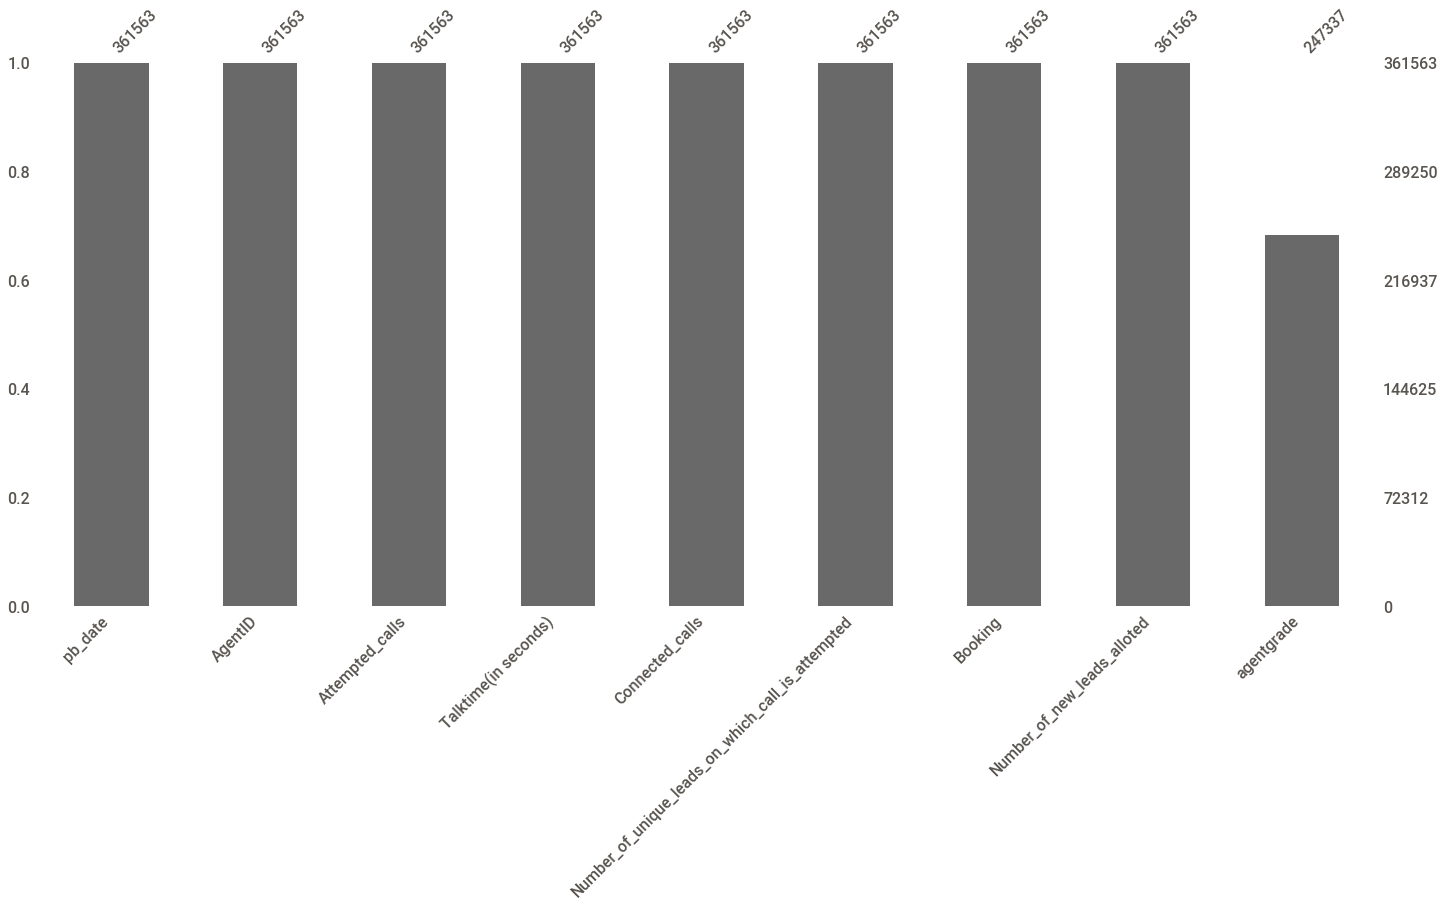

In [136]:
import missingno as msno
%matplotlib inline

msno.bar(df3)

In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 362kB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)


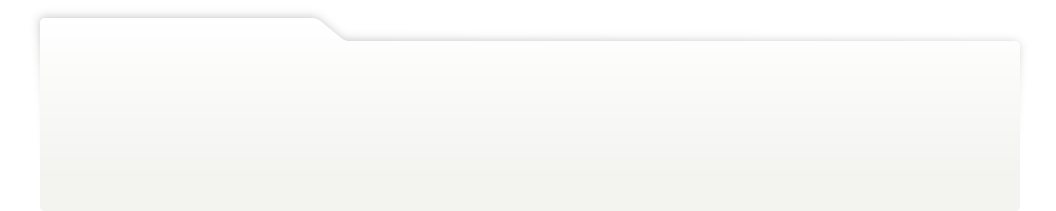
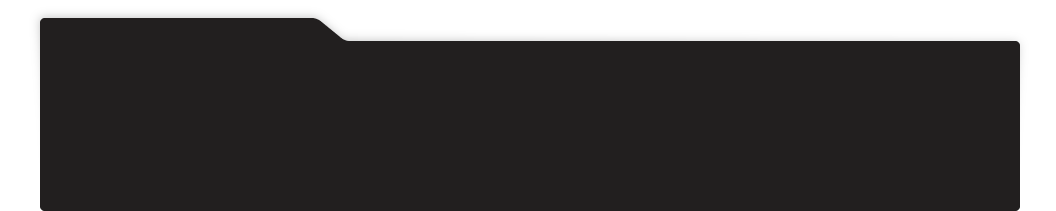
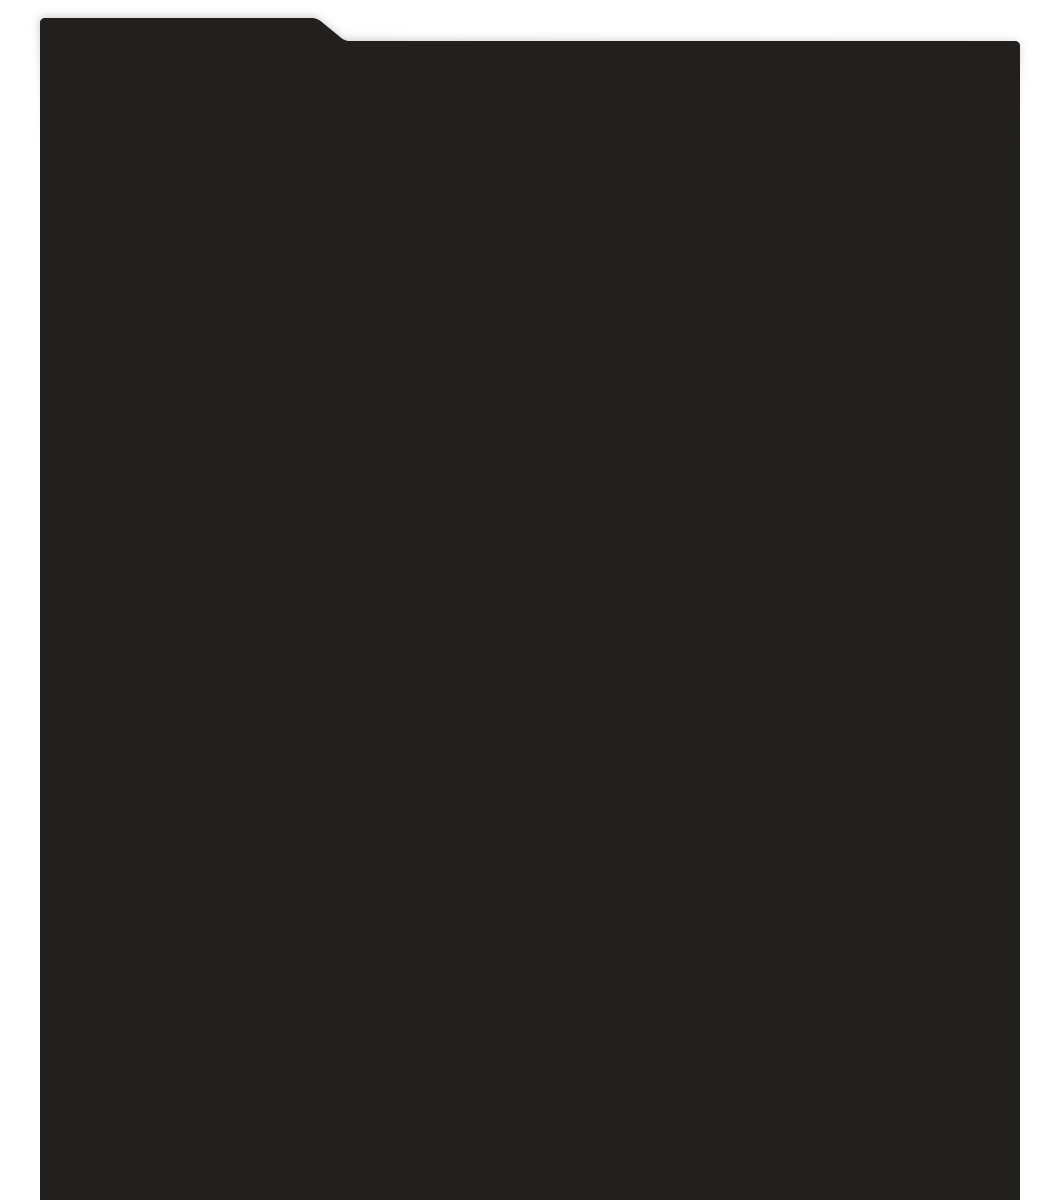
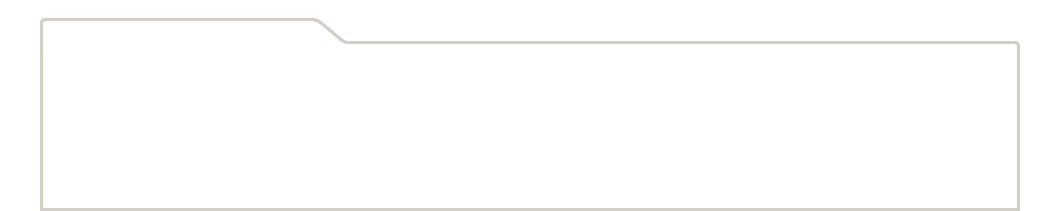
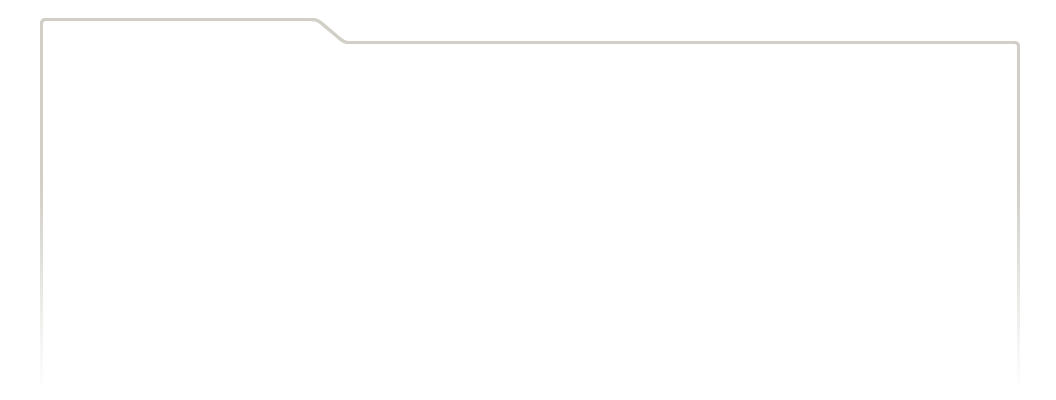
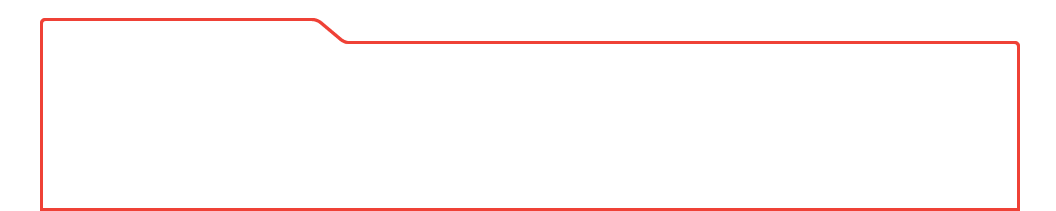
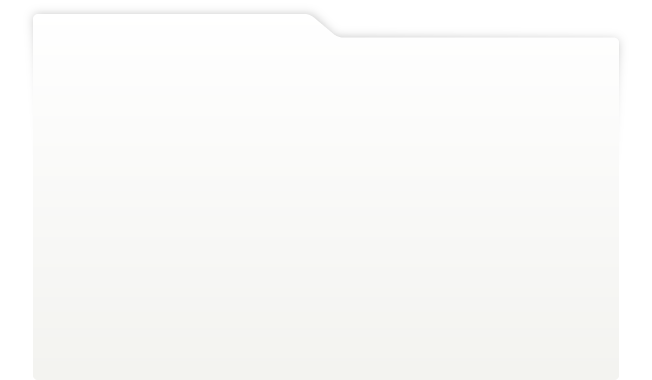
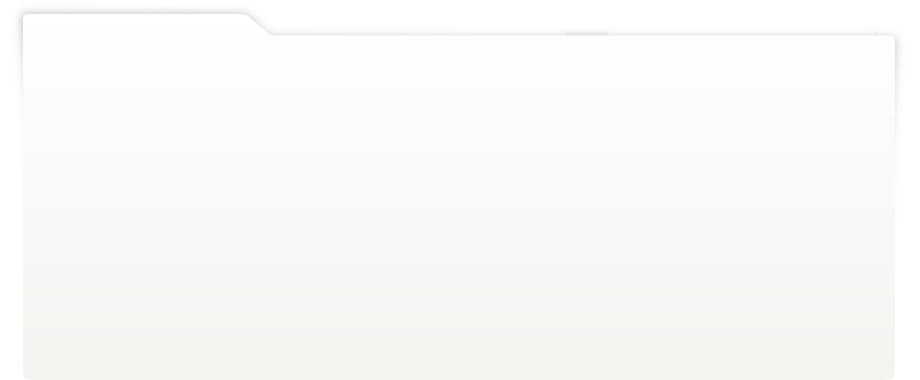
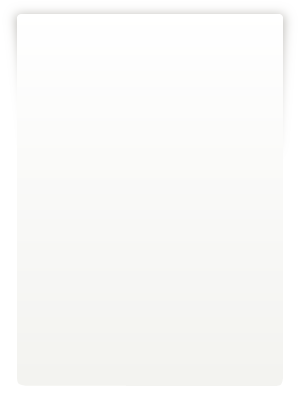
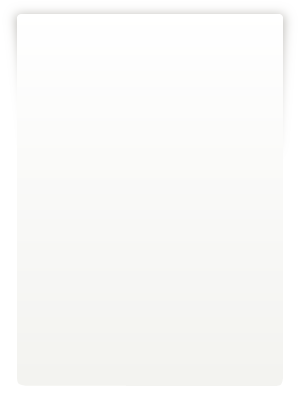
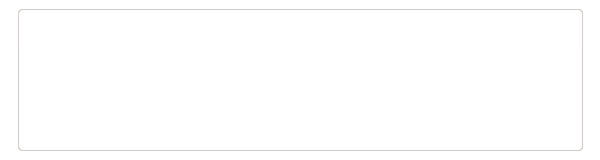
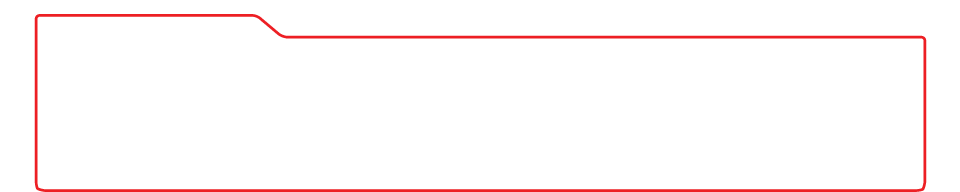
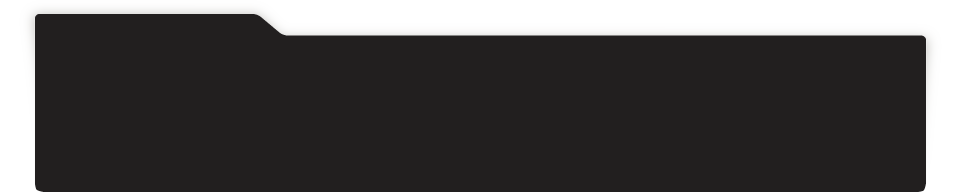
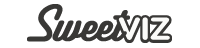
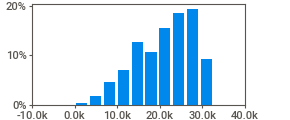
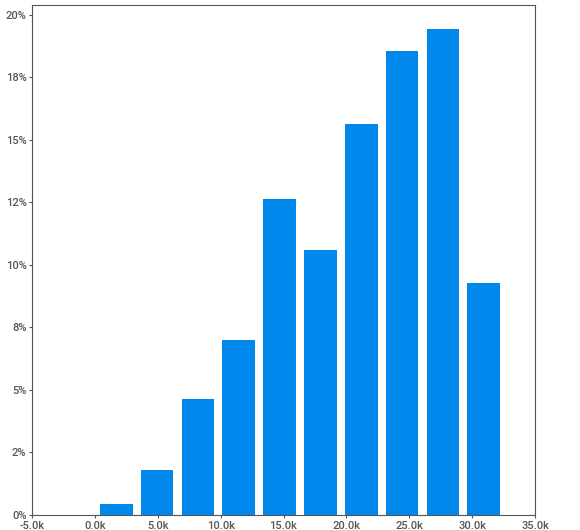
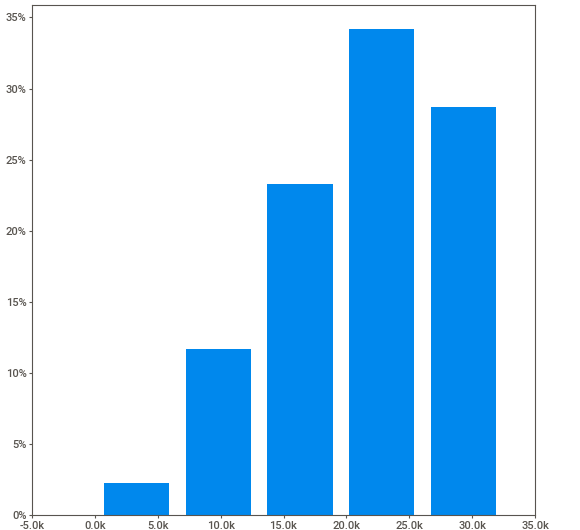
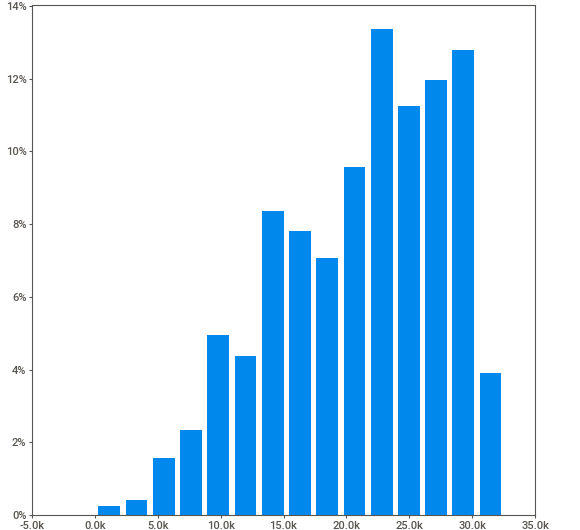
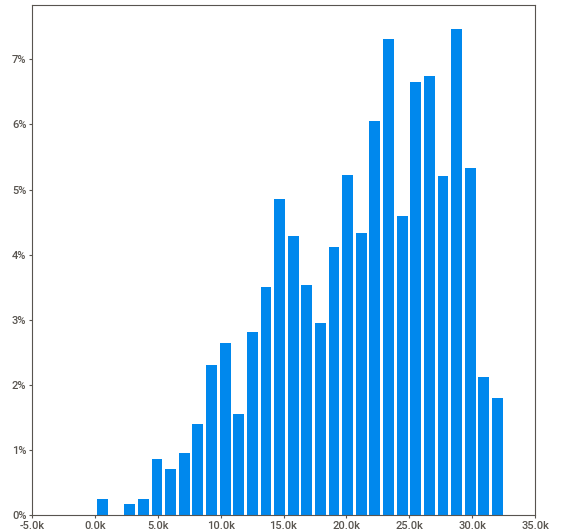
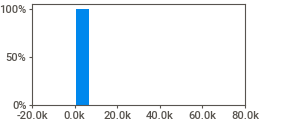
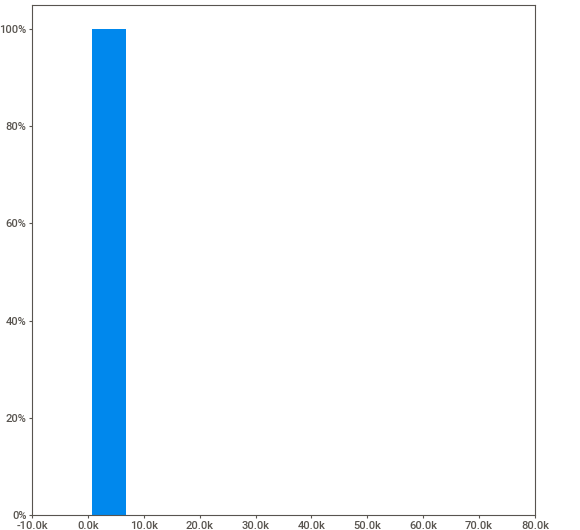
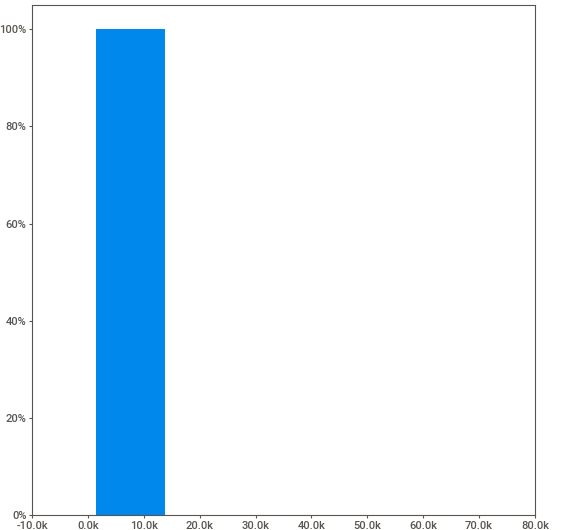
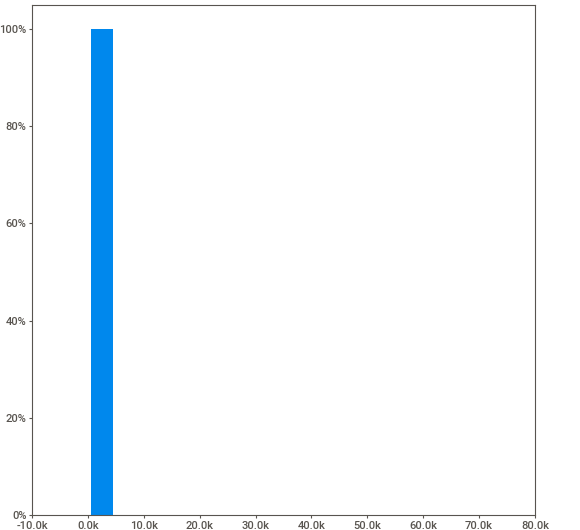
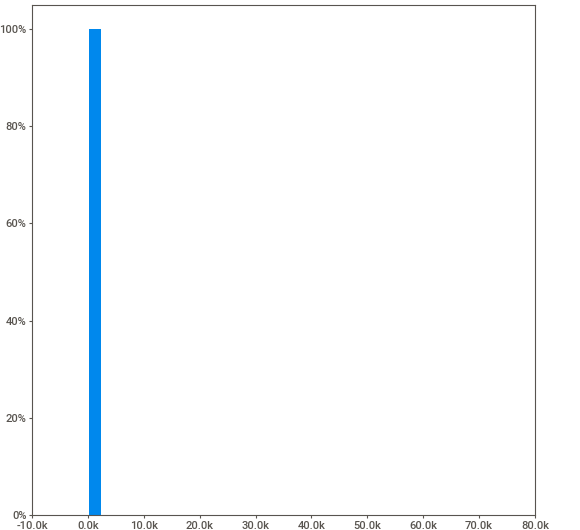
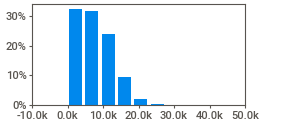
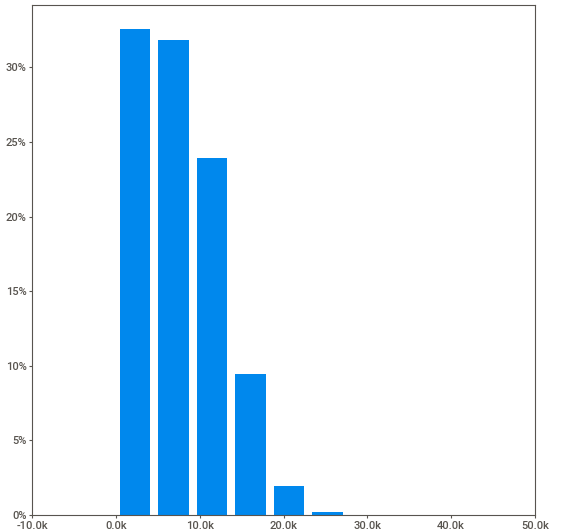
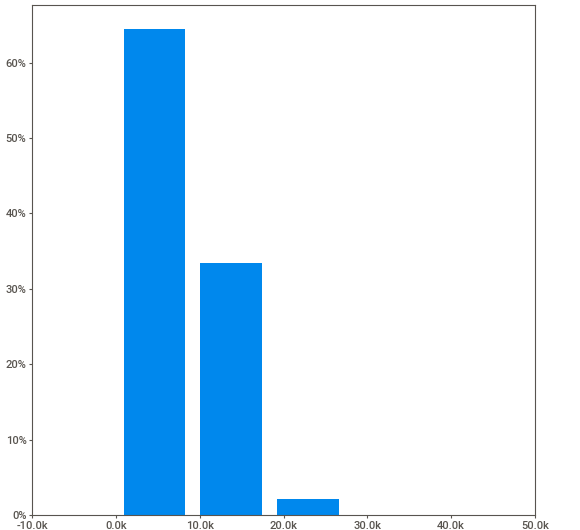
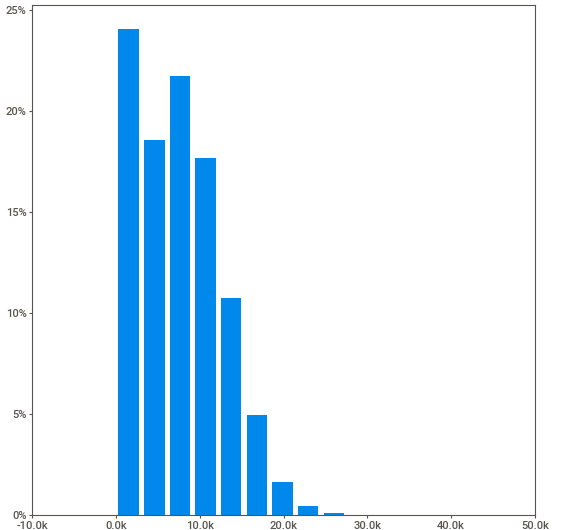
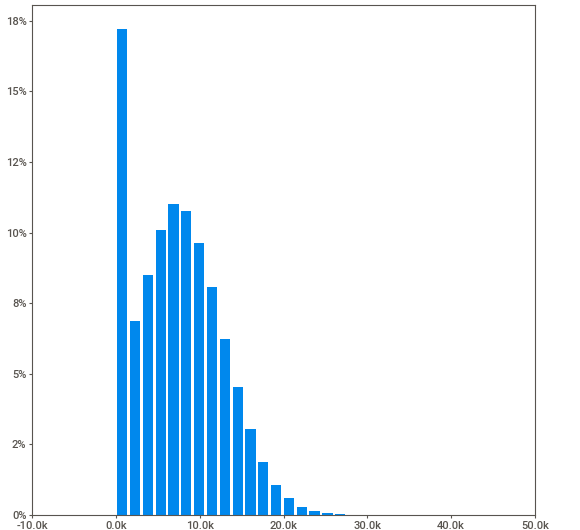
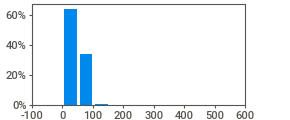
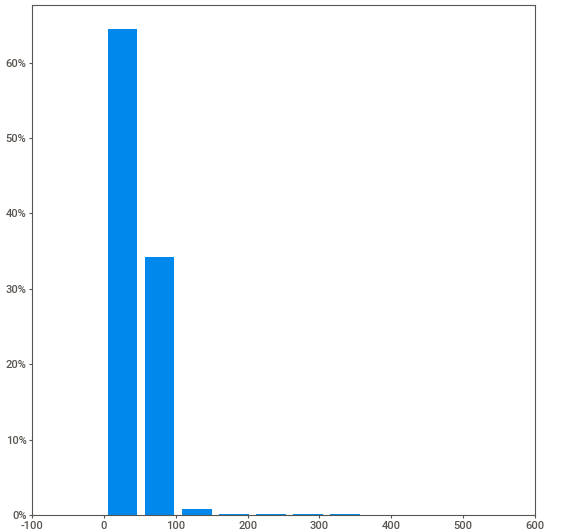
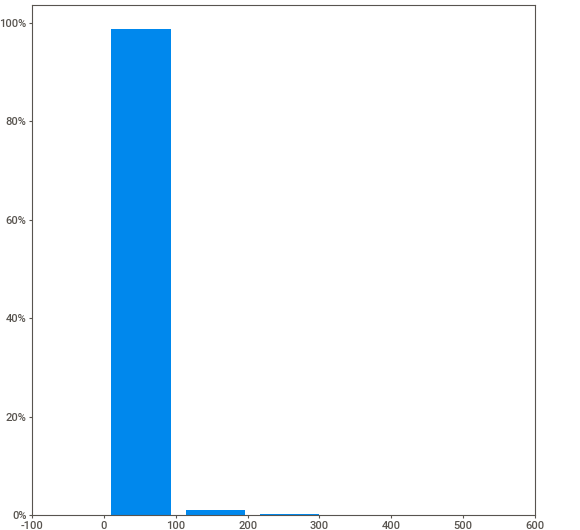
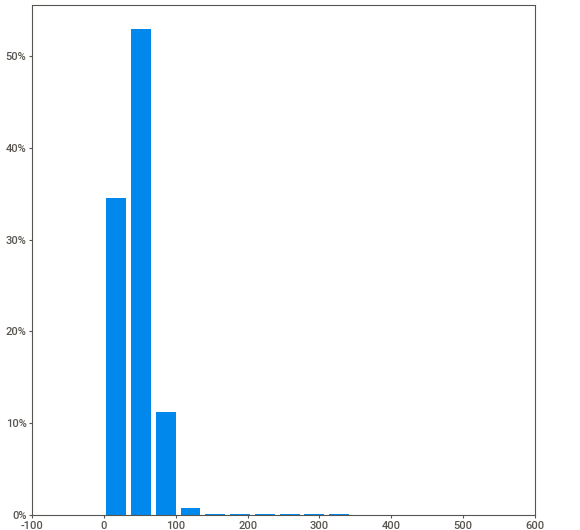
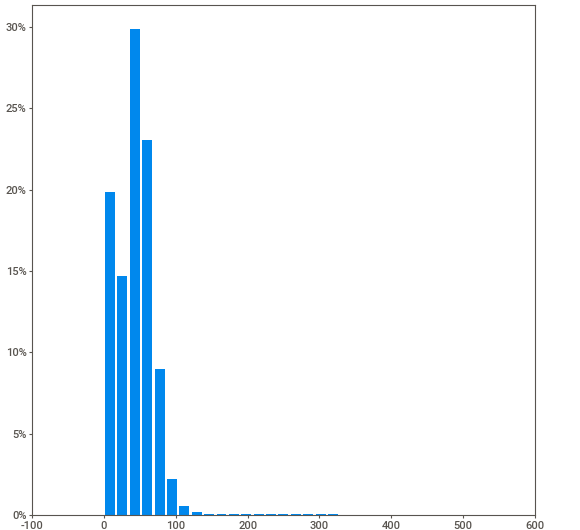
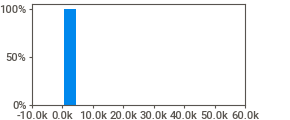
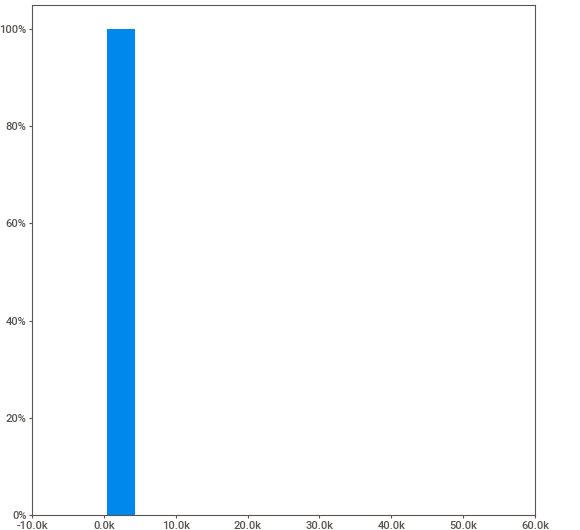
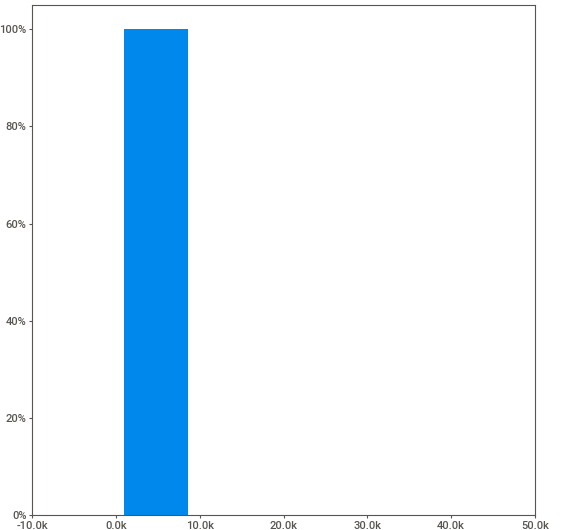
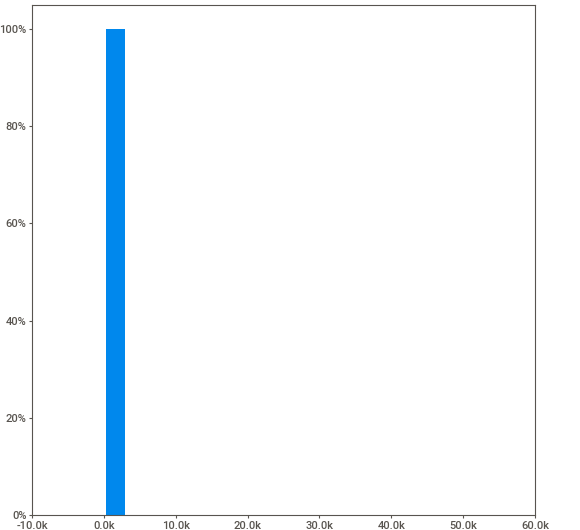
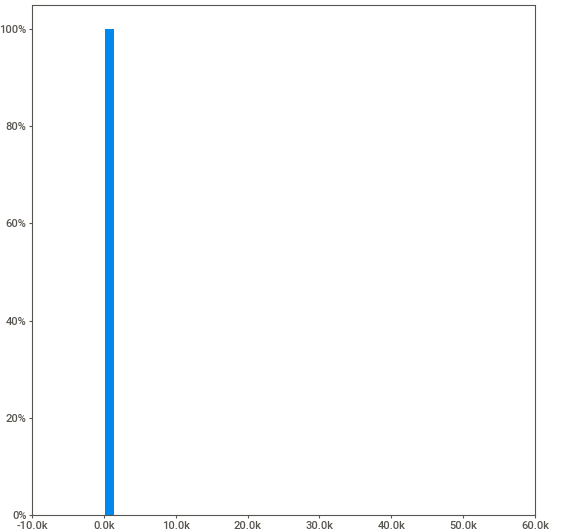
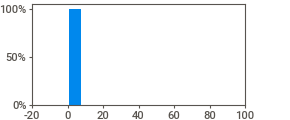
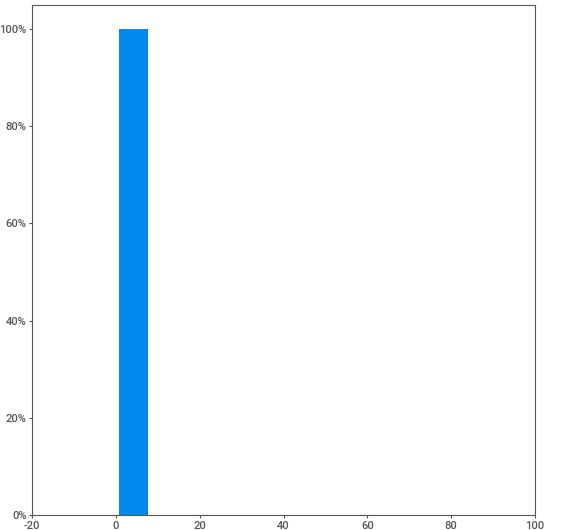
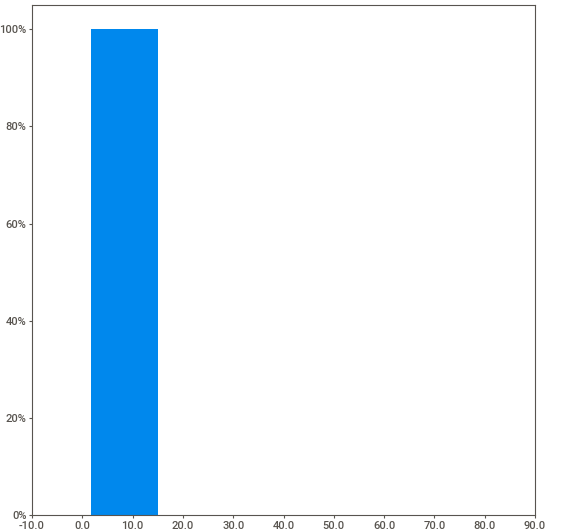
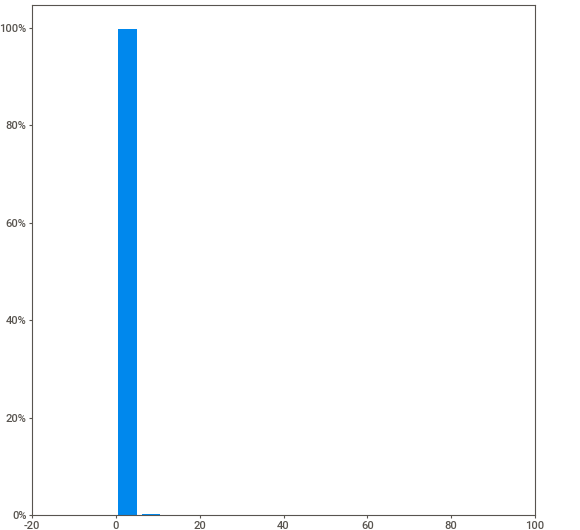
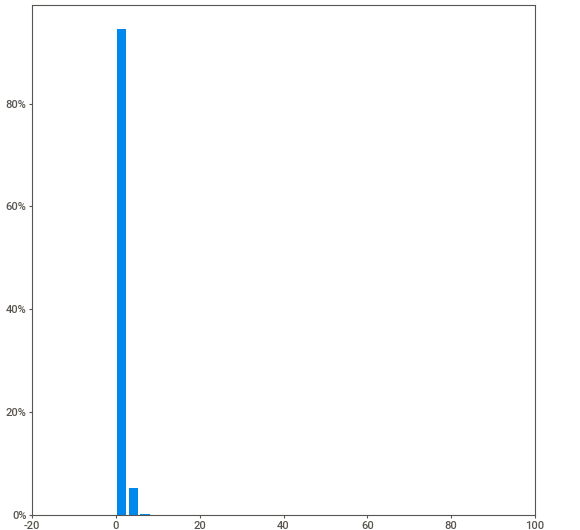
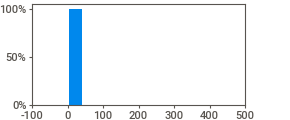
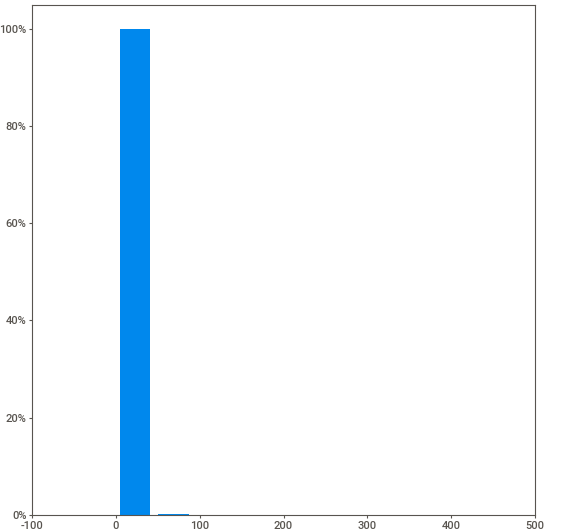
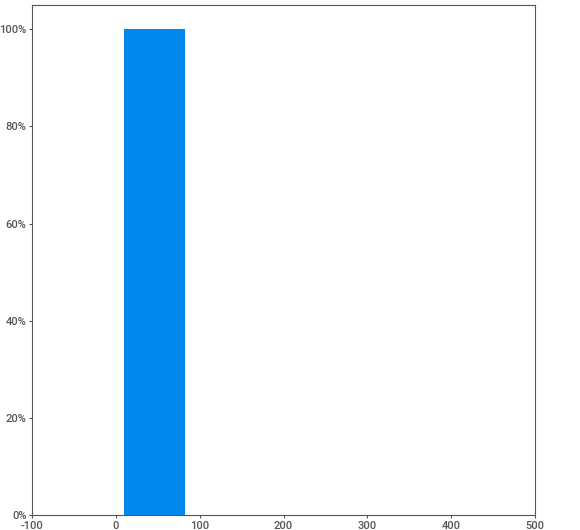
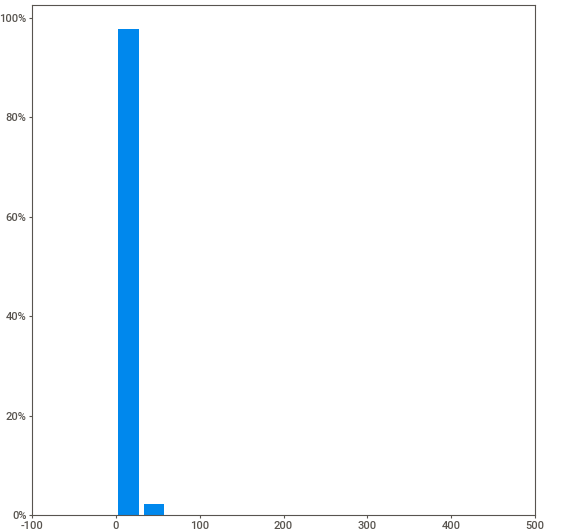
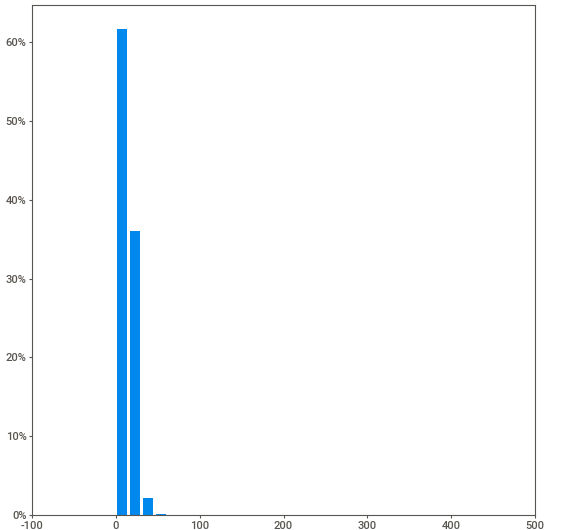
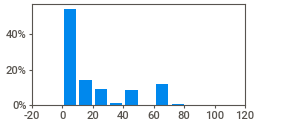
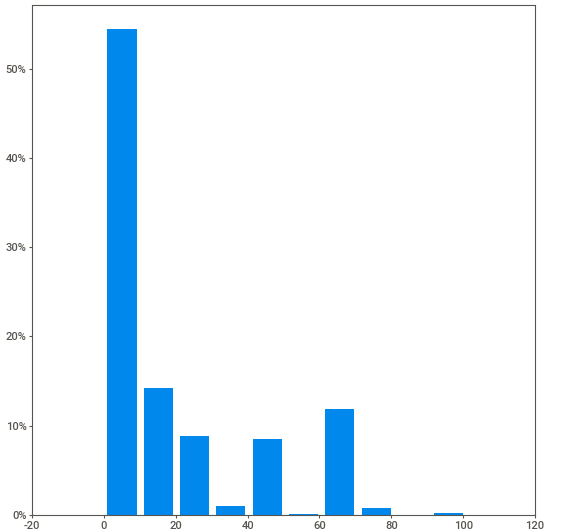
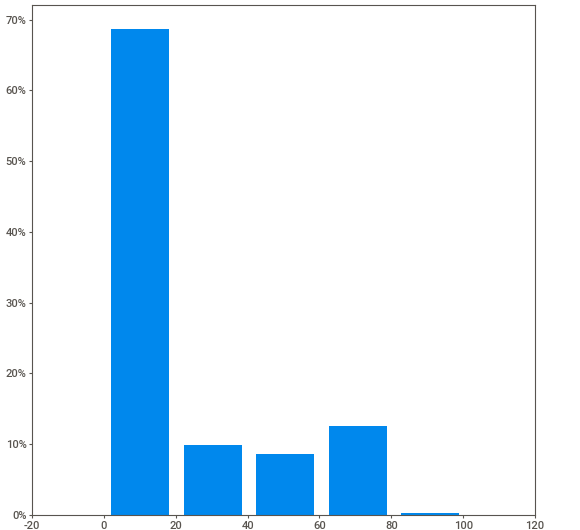
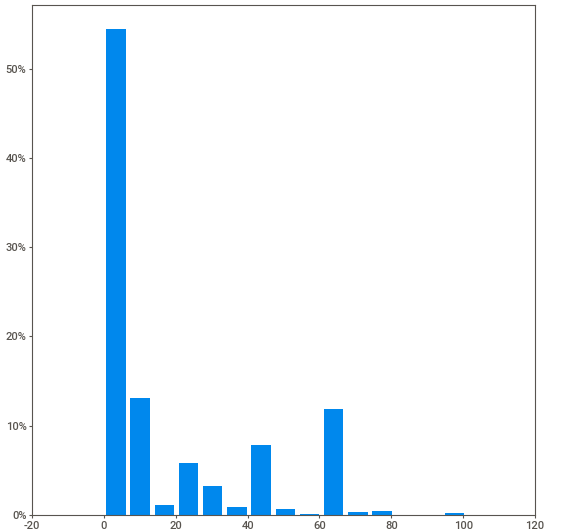
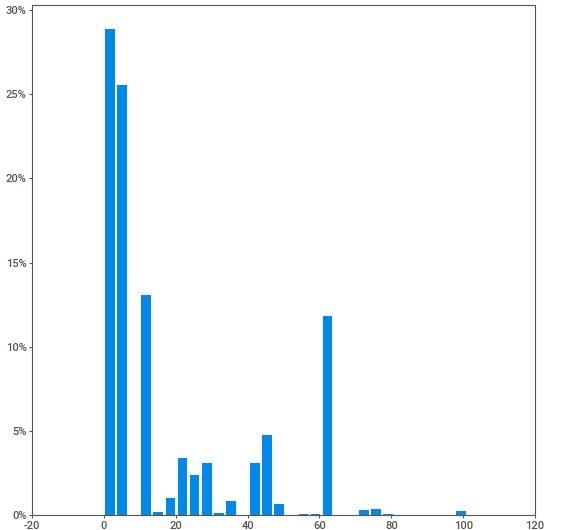
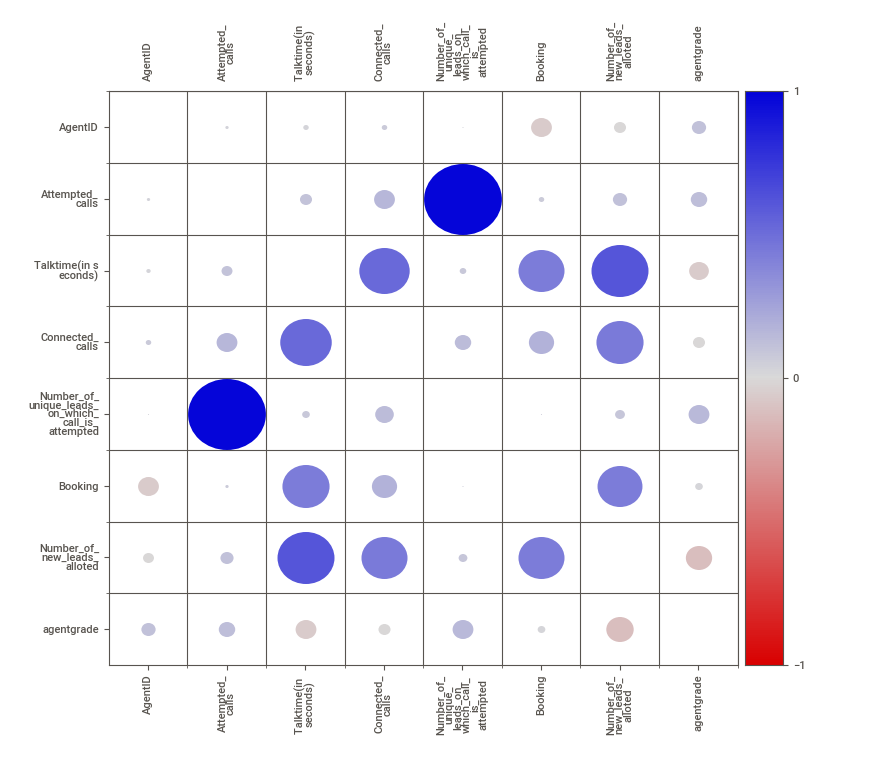
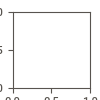

In [137]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
pb_report = sv.analyze(df3)
#display the report
##pb_report.show_html('PB.html',open_browser=True, layout='widescreen',scale=None)
pb_report.show_notebook()


In [138]:
for feature in df3 : 
  print(feature)

pb_date
AgentID
Attempted_calls
Talktime(in seconds)
Connected_calls
Number_of_unique_leads_on_which_call_is_attempted
Booking
Number_of_new_leads_alloted
agentgrade


BoxPlot,Distplot,Histogram for  AgentID


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

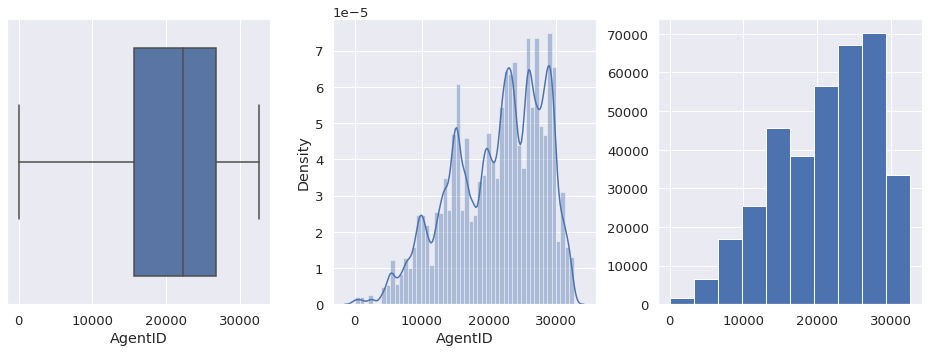

BoxPlot,Distplot,Histogram for  Attempted_calls


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

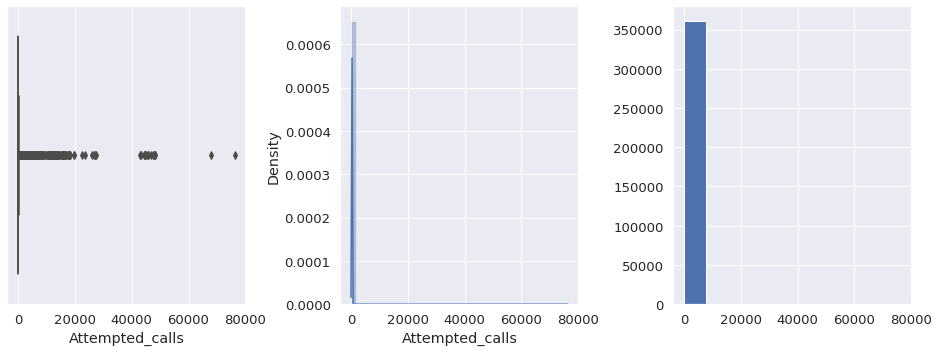

BoxPlot,Distplot,Histogram for  Talktime(in seconds)


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

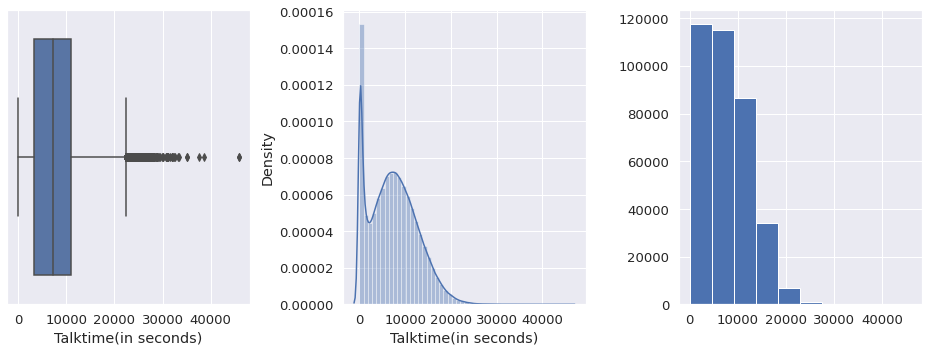

BoxPlot,Distplot,Histogram for  Connected_calls


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

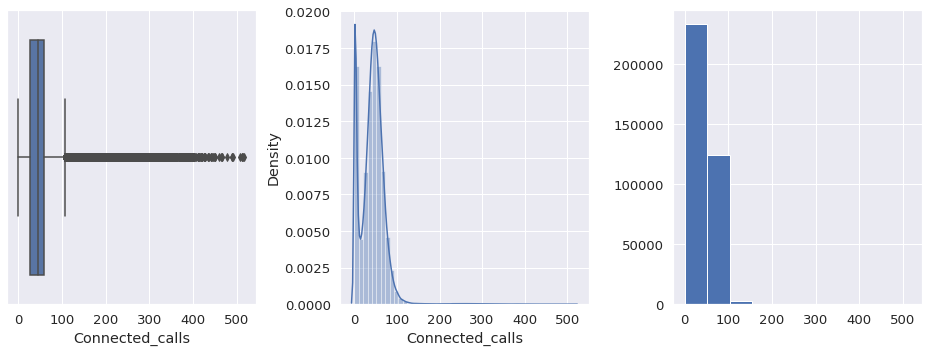

BoxPlot,Distplot,Histogram for  Number_of_unique_leads_on_which_call_is_attempted


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

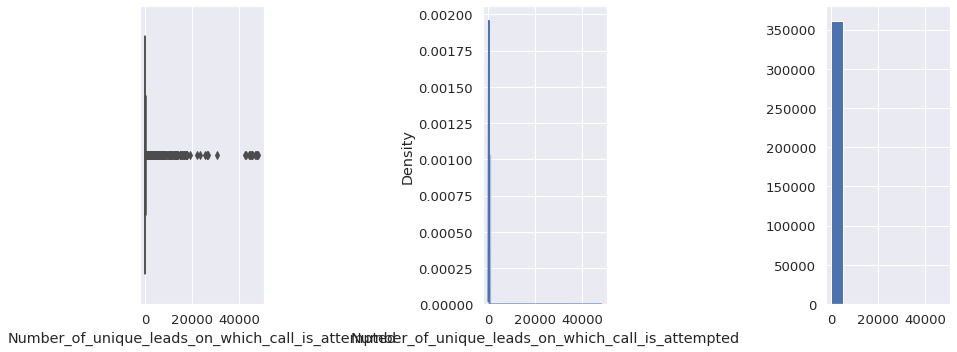

BoxPlot,Distplot,Histogram for  Booking


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

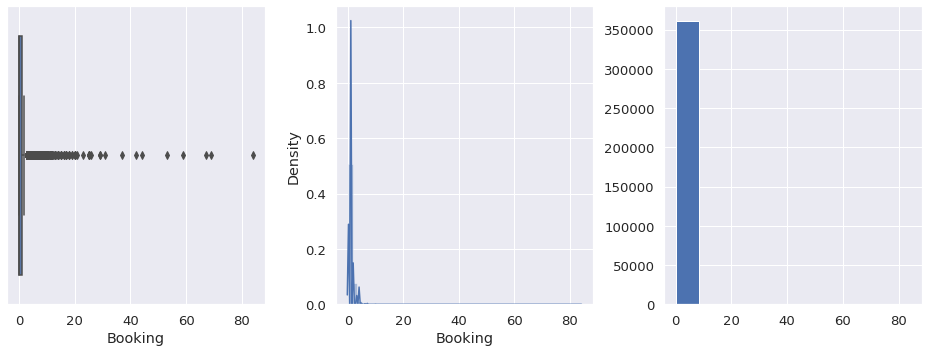

BoxPlot,Distplot,Histogram for  Number_of_new_leads_alloted


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

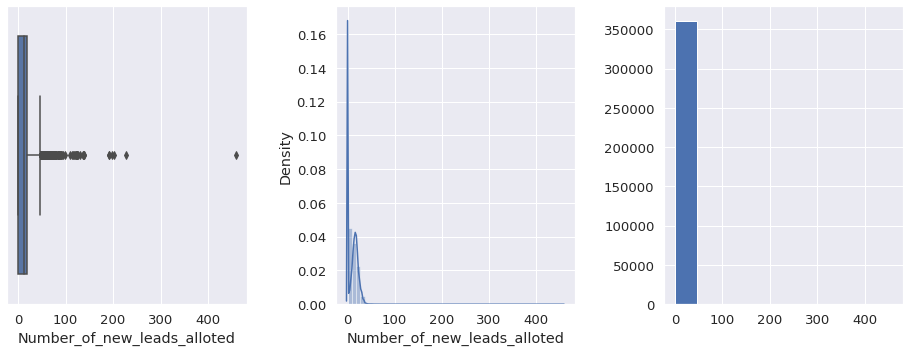

BoxPlot,Distplot,Histogram for  agentgrade


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x288 with 0 Axes>

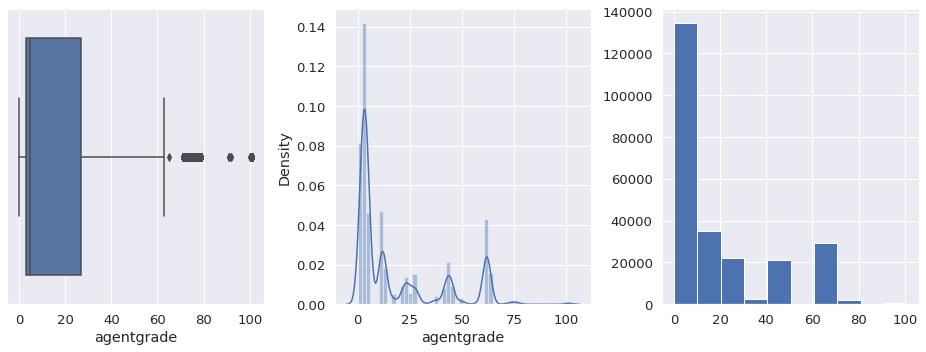

In [94]:
for feature in df3 :  
 ##fig,(ax1,ax2,ax3)=plt.subplots(1,3,
 if df3[feature].dtypes == np.int or df3[feature].dtypes == np.float:
        plt.figure(figsize=(15,4)) 
        # probplot
        print("BoxPlot,Distplot,Histogram for ", feature)
        plt.figure(figsize=(13,5)) 
        plt.subplot(1, 3, 1)
        sns.boxplot(x=feature,data=df3,orient='v')
        #distplot
        plt.subplot(1, 3, 2)
        sns.distplot(df3[feature])
        #histogram
        plt.subplot(1, 3, 3)
        df3[feature].hist()
        plt.subplots_adjust(wspace=0.5)
        plt.tight_layout()
        plt.show()

In [139]:
corr_Matrix = df3.corr()
corr_Matrix

,AgentID,Attempted_calls,Talktime(in seconds),Connected_calls,Number_of_unique_leads_on_which_call_is_attempted,Booking,Number_of_new_leads_alloted,agentgrade
AgentID,1.000000,-0.016863,-0.025760,0.021808,-0.011788,-0.114311,-0.053640,0.068781
Attempted_calls,-0.016863,1.000000,0.055665,0.116964,0.985412,0.020518,0.066099,0.079945
Talktime(in seconds),-0.025760,0.055665,1.000000,0.494868,0.033429,0.403823,0.593974,-0.110313
Connected_calls,0.021808,0.116964,0.494868,1.000000,0.086450,0.138636,0.409060,-0.052698
Number_of_unique_leads_on_which_call_is_attempted,-0.011788,0.985412,0.033429,0.086450,1.000000,0.011218,0.040674,0.108288
Booking,-0.114311,0.020518,0.403823,0.138636,0.011218,1.000000,0.397883,-0.033363
Number_of_new_leads_alloted,-0.053640,0.066099,0.593974,0.409060,0.040674,0.397883,1.000000,-0.177876
agentgrade,0.068781,0.079945,-0.110313,-0.052698,0.108288,-0.033363,-0.177876,1.000000


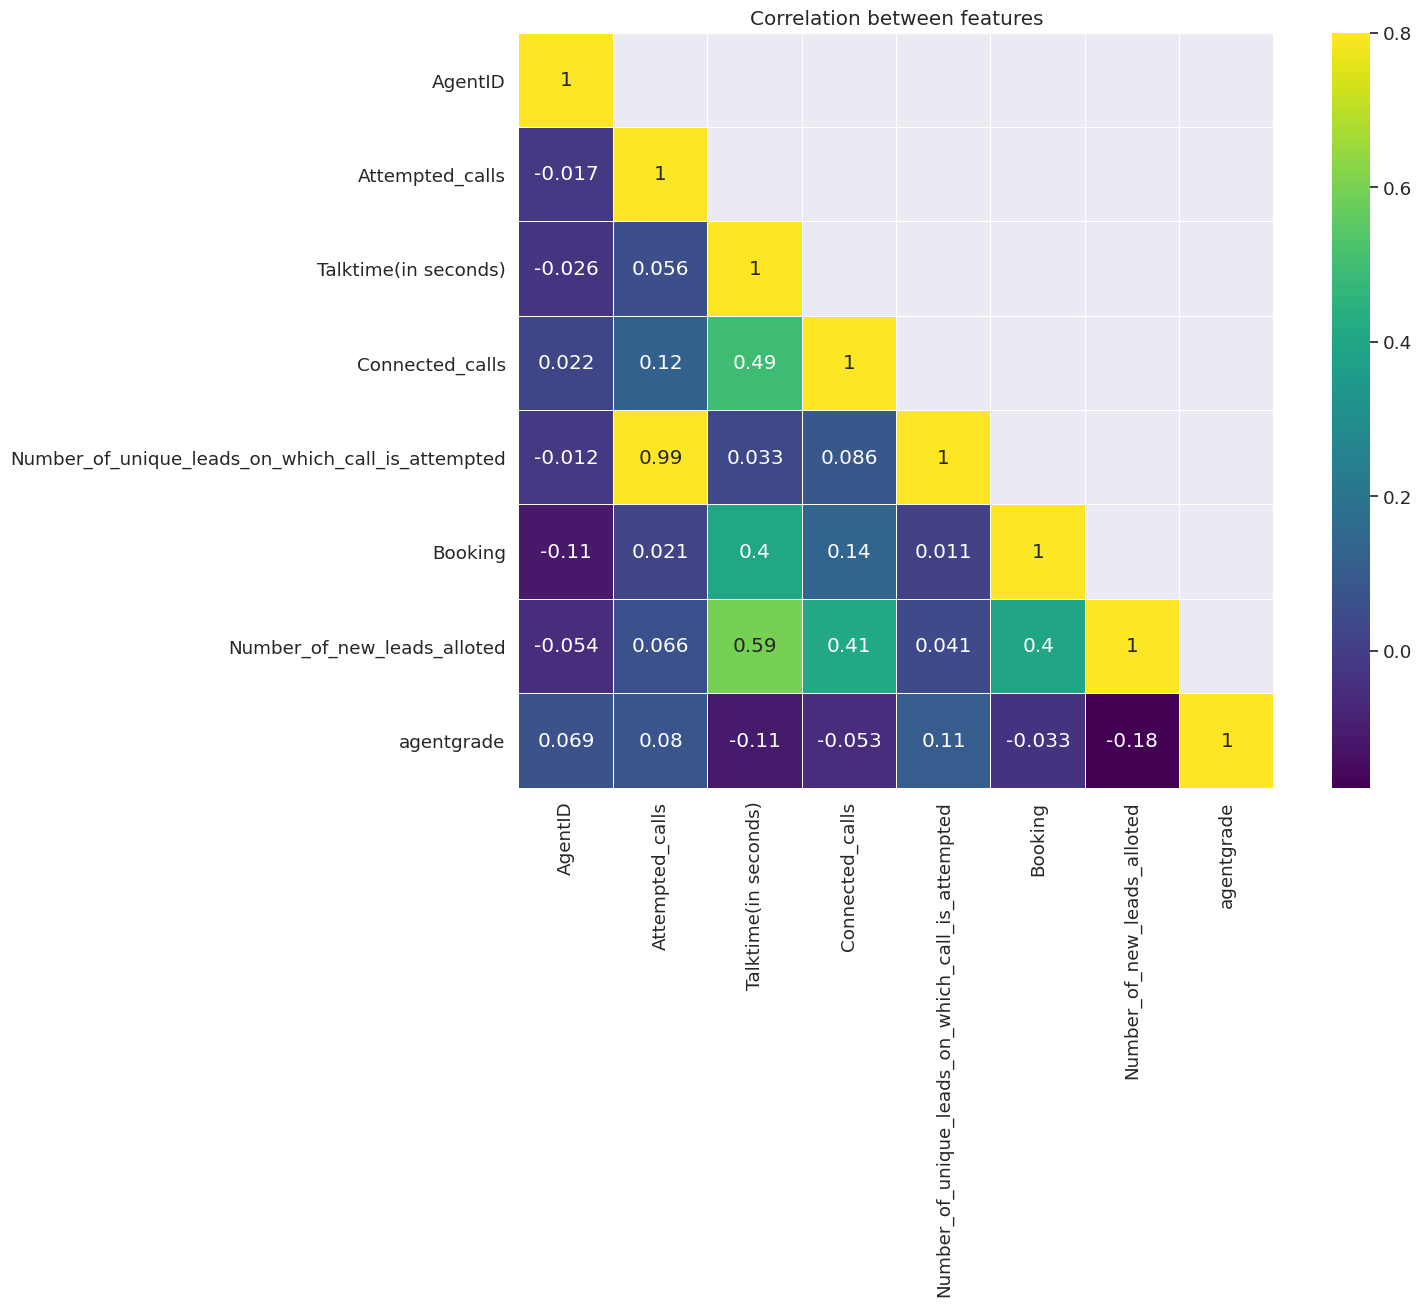

In [140]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(corr_Matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white", mask = np.triu(corr_Matrix, +1) )
plt.title('Correlation between features');

In [141]:
def aboutdf (df):
    count_null = df.isnull().sum()
    df_stats = pd.DataFrame(index = df.columns, data =
                           {'datatype': df.dtypes,
                            'unique_values': df.nunique(),
                            'Number of null values' : count_null})
    return df_stats

In [142]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

# Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)   

                        # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [143]:
props =pd.read_csv('Final_data_of_Anomaly_detection.csv')

In [144]:
props, NAlist = reduce_mem_usage(df3)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 24.826683044433594  MB
******************************
Column:  AgentID
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Attempted_calls
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  Talktime(in seconds)
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Connected_calls
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Number_of_unique_leads_on_which_call_is_attempted
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Booking
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Number_of_new_leads_alloted
dtype before:  int64
dtype after:  uint16
*****************************

In [147]:
print(df3.dtypes)

pb_date                                              datetime64[ns]
AgentID                                                      uint16
Attempted_calls                                              uint32
Talktime(in seconds)                                         uint16
Connected_calls                                              uint16
Number_of_unique_leads_on_which_call_is_attempted            uint16
Booking                                                       uint8
Number_of_new_leads_alloted                                  uint16
agentgrade                                                    uint8
dtype: object


In [146]:
df3.pb_date = pd.to_datetime(df3.pb_date)
pb_date = pd.to_datetime(df3.pb_date)

In [148]:
# extract month feature
months= df3.pb_date.dt.month


In [149]:
# extract day of month feature
day_of_months = df3.pb_date.dt.day

In [150]:
# is_weekend flag 
day_names = df3.pb_date.dt.day_name()
is_weekend = day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

In [152]:
features = pd.concat([pb_date, is_weekend, day_of_months, months],keys=['pb_date','is_weekend', 'day_of_months','months'], axis = 1)

In [153]:
features.head()

,pb_date,is_weekend,day_of_months,months
0,2020-05-02,1,2,5
1,2020-05-02,1,2,5
2,2020-05-02,1,2,5
3,2020-05-02,1,2,5
4,2020-05-02,1,2,5


In [154]:
df3.head()

,pb_date,AgentID,Attempted_calls,Talktime(in seconds),Connected_calls,Number_of_unique_leads_on_which_call_is_attempted,Booking,Number_of_new_leads_alloted,agentgrade
0,2020-05-02,108,62,7831,33,28,1,19,4
1,2020-05-02,1092,29,6141,21,19,0,13,3
2,2020-05-02,2354,22,6092,15,12,1,18,1
3,2020-05-02,2631,40,9752,29,25,2,18,1
4,2020-05-02,4090,48,8022,20,24,1,18,1


In [155]:
features.dtypes

pb_date          datetime64[ns]
is_weekend                int64
day_of_months             int64
months                    int64
dtype: object

In [156]:
features.shape

(361563, 4)

In [157]:
df3.shape

(361563, 9)

In [163]:

df3['agentgrade'].replace(-1, np.nan, inplace=True)

In [164]:
df3['agentgrade'].isnull().sum()

0

In [165]:
df3['agentgrade'].unique()

array([  4,   3,   1,  11,  12,   2,  13, 255,   5,  32, 101,  35,  50,
        37,  17,  19,   7,  24,  18,  23,   6,  41,  42,  44,  43, 100,
        27,  28,  61,  63,  62,   0,  40,  29,  92,  14,  22,  25,  21,
        65,  45,  51,  26,  91,  78,  79,  73,  72,  75,  76,  71,  74,
        77,  47,  46,  52,  58,  56,  57,  48,  55,  49,  54], dtype=uint8)

In [167]:
df3['Attempted_calls'].groupby('Talktime(in seconds)')['Connected_calls']

KeyError: ignored

In [160]:
# imports
import pandas as pd
import plotly.graph_objects as go

# to make notebook work offline
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [161]:
# Helper function to transform regular data to sankey format
# Returns data and layout as dictionary
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [162]:
# Generating regular sankey diagram
sank = genSankey(df3,cat_cols=['agentgrade'],value_cols=['Attempted_calls','Talktime(in seconds)','Connected_calls'],title='Merchant Transactions')
fig = go.Figure(sank)
iplot(fig)

UnboundLocalError: ignored

In [114]:

= pd.concat([df3, features], axis = 1)

ValueError: ignored

In [113]:
df3.tail()

,pb_date,AgentID,Attempted_calls,Talktime(in seconds),Connected_calls,Number_of_unique_leads_on_which_call_is_attempted,Booking,Number_of_new_leads_alloted,agentgrade,is_weekend,day_of_months,months
361558,2021-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,5.0
361559,2021-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,5.0
361560,2021-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,5.0
361561,2021-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,5.0
361562,2021-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,5.0


In [ ]:
import seaborn as sns
sns.pairplot(df3[['Attempted_calls',
 'Talktime(in seconds)',
 'Connected_calls',
 'Number_of_unique_leads_on_which_call_is_attempted',
 'Booking',
 'Number_of_new_leads_alloted'
 ]])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


Error in callback <function flush_figures at 0x7f0f0001e3b0> (for post_execute):


KeyboardInterrupt: ignored

In [25]:
aboutdf(df3)

,datatype,unique_values,Number of null values
pb_date,datetime64[ns],367,0
AgentID,float64,2462,361563
Attempted_calls,float64,867,361563
Talktime(in seconds),float64,22418,361563
Connected_calls,float64,428,361563
Number_of_unique_leads_on_which_call_is_attempted,float64,742,361563
Booking,float64,35,361563
Number_of_new_leads_alloted,float64,112,361563
agentgrade,float64,62,475789
is_weekend,float64,2,361563


In [ ]:
## Hierarchial CLustering( meena)
##kmean++
## DBSCAN
##means shift(Meena)


In [ ]:
data = df3.drop('pb_date', axis=1)

In [ ]:
data.isnull().sum()

AgentID                                                   0
Attempted_calls                                           0
Talktime(in seconds)                                      0
Connected_calls                                           0
Number_of_unique_leads_on_which_call_is_attempted         0
Booking                                                   0
Number_of_new_leads_alloted                               0
agentgrade                                           114226
dtype: int64

In [ ]:
props.dtypes

pb_date                                              object
AgentID                                              uint16
Attempted_calls                                      uint32
Talktime(in seconds)                                 uint16
Connected_calls                                      uint16
Number_of_unique_leads_on_which_call_is_attempted    uint16
Booking                                               uint8
Number_of_new_leads_alloted                          uint16
agentgrade                                            uint8
dtype: object

In [ ]:
## Hierarchial clsutering crashes
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Xdata = props.drop('pb_date', axis=1)

In [ ]:
Xdata.dtypes

AgentID                                              uint16
Attempted_calls                                      uint32
Talktime(in seconds)                                 uint16
Connected_calls                                      uint16
Number_of_unique_leads_on_which_call_is_attempted    uint16
Booking                                               uint8
Number_of_new_leads_alloted                          uint16
agentgrade                                            uint8
dtype: object

In [ ]:
wardlink = linkage(Xdata, method = 'ward')

In [ ]:
dend = dendrogram(wardlink)

In [ ]:
## kmeans

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = StandardScaler()

In [ ]:
scaled_df = X.fit_transform(Xdata)

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

1222219.1255668951

In [ ]:
k_means = KMeans(n_clusters = 10)
k_means.fit(scaled_df)
k_means.inertia_

730722.7490748276

In [ ]:
k_means = KMeans(n_clusters = 15)
k_means.fit(scaled_df)
k_means.inertia_

587868.3106160446

In [ ]:
k_means = KMeans(n_clusters = 20)
k_means.fit(scaled_df)
k_means.inertia_

504964.156344255

In [ ]:
k_means = KMeans(n_clusters = 25)
k_means.fit(scaled_df)
k_means.inertia_

445908.51667164464

In [ ]:
k_means = KMeans(n_clusters = 30)
k_means.fit(scaled_df)
k_means.inertia_

407292.92369006865

In [ ]:
k_means = KMeans(n_clusters = 35)
k_means.fit(scaled_df)
k_means.inertia_

In [ ]:
wss=[]
for i in range(1,25):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

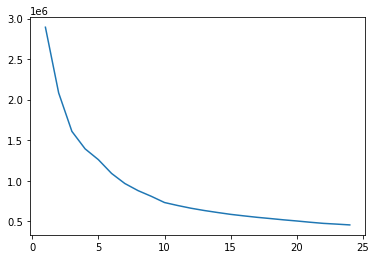

In [ ]:
plt.plot(range(1,25), wss)

In [ ]:
##Means Shift Clustering

import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D